In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils import to_categorical
from keras.regularizers import l2, l1
from keras.datasets import mnist
%matplotlib inline

Using TensorFlow backend.


## Image Classification

In [2]:
import random
random.seed(1234)

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# prepare images
train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape( (10000, 28 * 28) )
test_images = test_images.astype('float32') / 255

In [4]:
class Network():
    batchsize = 512
    epochs = 200
    splits = 1/6
    x_vals = np.arange(1, epochs+1)
    def __init__(self):
        self._network = models.Sequential()
    def initial_test(self):
        self._network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dense(10, activation='softmax'))
    def drop_out(self):
        self._network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
        self._network.add(layers.Dropout(0.5))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dropout(0.5))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dropout(0.5))
        self._network.add(layers.Dense(512, activation='relu'))
        self._network.add(layers.Dropout(0.5))
        self._network.add(layers.Dense(10, activation='softmax'))
    def l1(self):
        self._network.add(layers.Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(28 * 28,)))
        self._network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
        self._network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
        self._network.add(layers.Dense(512, kernel_regularizer=l1(0.001), activation='relu'))
        self._network.add(layers.Dense(10, activation='softmax'))
    def l2(self):
        self._network.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(28 * 28,)))
        self._network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
        self._network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
        self._network.add(layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'))
        self._network.add(layers.Dense(10, activation='softmax'))
    def train(self):
        self._network.compile(optimizer='rmsprop', 
                        loss='categorical_crossentropy', 
                        metrics=['acc'])
        self._fit = self._network.fit(train_images, train_labels, 
                                      epochs=Network.epochs, 
                                      batch_size=Network.batchsize, 
                                      validation_split=Network.splits)
    def stats(self):
        return self._fit.history, Network.x_vals       
    @property
    def fit(self):
        return self._fit

#### i. Initial Test

In [5]:
network = Network()
network.initial_test()
network.train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.5295 - acc: 0.8332 - val_loss: 0.1704 - val_acc: 0.9498
Epoch 2/200
50000/50000 [==============================] - 5s 106us/step - loss: 0.1556 - acc: 0.9533 - val_loss: 0.1580 - val_acc: 0.9519
Epoch 3/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0980 - acc: 0.9701 - val_loss: 0.1586 - val_acc: 0.9582
Epoch 4/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0683 - acc: 0.9789 - val_loss: 0.1295 - val_acc: 0.9635
Epoch 5/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.1065 - val_acc: 0.9746
Epoch 6/200
50000/50000 [==============================] - 6s 111us/step - loss: 0.0369 - acc: 0.9889 - val_loss: 0.0830 - val_acc: 0.9782
Epoch 7/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.

50000/50000 [==============================] - 5s 104us/step - loss: 0.0068 - acc: 0.9989 - val_loss: 0.1547 - val_acc: 0.9835
Epoch 60/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0054 - acc: 0.9992 - val_loss: 0.2079 - val_acc: 0.9798
Epoch 61/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0085 - acc: 0.9988 - val_loss: 0.2019 - val_acc: 0.9807
Epoch 62/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0085 - acc: 0.9986 - val_loss: 0.1853 - val_acc: 0.9809
Epoch 63/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0055 - acc: 0.9990 - val_loss: 0.2000 - val_acc: 0.9810
Epoch 64/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0055 - acc: 0.9990 - val_loss: 0.1977 - val_acc: 0.9806
Epoch 65/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0046 - acc: 0.9992 - val_loss: 0.1868 - val_acc: 0.9818
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 5s 105us/step - loss: 0.0053 - acc: 0.9992 - val_loss: 0.1893 - val_acc: 0.9829
Epoch 118/200
50000/50000 [==============================] - 5s 105us/step - loss: 9.0535e-04 - acc: 0.9999 - val_loss: 0.2066 - val_acc: 0.9824
Epoch 119/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0065 - acc: 0.9993 - val_loss: 0.2018 - val_acc: 0.9818
Epoch 120/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0065 - acc: 0.9991 - val_loss: 0.1980 - val_acc: 0.9812
Epoch 121/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0054 - acc: 0.9993 - val_loss: 0.1988 - val_acc: 0.9826
Epoch 122/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0072 - acc: 0.9991 - val_loss: 0.1922 - val_acc: 0.9836
Epoch 123/200
50000/50000 [==============================] - 5s 103us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.1879 - val_acc: 0.9825
Epoch 124/200
50000/500

50000/50000 [==============================] - 5s 104us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 0.2432 - val_acc: 0.9790
Epoch 176/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0048 - acc: 0.9995 - val_loss: 0.2210 - val_acc: 0.9815
Epoch 177/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0056 - acc: 0.9994 - val_loss: 0.2028 - val_acc: 0.9832
Epoch 178/200
50000/50000 [==============================] - 5s 105us/step - loss: 0.0063 - acc: 0.9993 - val_loss: 0.1753 - val_acc: 0.9837
Epoch 179/200
50000/50000 [==============================] - 5s 107us/step - loss: 0.0042 - acc: 0.9996 - val_loss: 0.2052 - val_acc: 0.9821
Epoch 180/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.1902 - val_acc: 0.9824
Epoch 181/200
50000/50000 [==============================] - 5s 104us/step - loss: 0.0061 - acc: 0.9994 - val_loss: 0.1886 - val_acc: 0.9837
Epoch 182/200
50000/50000 [

Text(0.5,1,'Validation Accuracy and Error by epoch (baseline)')

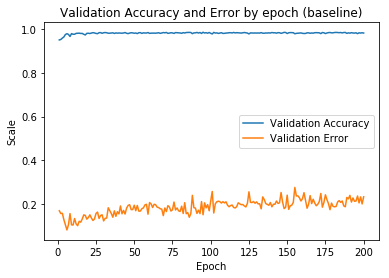

In [6]:
history, xvals = network.stats()
verr1, vacc1, terr1, tacc1 = history['val_loss'], history['val_acc'], history['loss'], history['acc']
plt.plot(xvals, vacc1, label='Validation Accuracy')
plt.plot(xvals, verr1, label='Validation Error')
plt.xlabel("Epoch")
plt.ylabel("Scale")
plt.legend(loc='best')
plt.title("Validation Accuracy and Error by epoch (baseline)")

Observation: The validation accurarcy starts to increase in the first 20 epoch but slowly decreases (remains the same) after the 20th epoch. Meantime the validation error steadily increases after the 20th epoch, implying overfitting problems have occured. This reminds us to set the epochs argument to be around 20 to prevent overfitting issues.

#### ii. Implement dropout

In [7]:
network_d = Network()
network_d.drop_out()
network_d.train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.7489 - acc: 0.7549 - val_loss: 0.2078 - val_acc: 0.9365
Epoch 2/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.2685 - acc: 0.9215 - val_loss: 0.1332 - val_acc: 0.9630
Epoch 3/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.2036 - acc: 0.9415 - val_loss: 0.1322 - val_acc: 0.9626
Epoch 4/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.1653 - acc: 0.9530 - val_loss: 0.1207 - val_acc: 0.9664
Epoch 5/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1423 - acc: 0.9604 - val_loss: 0.0888 - val_acc: 0.9755
Epoch 6/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.1282 - acc: 0.9645 - val_loss: 0.0901 - val_acc: 0.9758
Epoch 7/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.1172 - acc: 0.9665 - val_loss: 0.

50000/50000 [==============================] - 6s 127us/step - loss: 0.0526 - acc: 0.9893 - val_loss: 0.1013 - val_acc: 0.9837
Epoch 60/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0502 - acc: 0.9900 - val_loss: 0.1010 - val_acc: 0.9840
Epoch 61/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0531 - acc: 0.9889 - val_loss: 0.0984 - val_acc: 0.9822
Epoch 62/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0482 - acc: 0.9902 - val_loss: 0.1044 - val_acc: 0.9839
Epoch 63/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.0527 - acc: 0.9900 - val_loss: 0.0995 - val_acc: 0.9846
Epoch 64/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0501 - acc: 0.9899 - val_loss: 0.1014 - val_acc: 0.9841
Epoch 65/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0513 - acc: 0.9894 - val_loss: 0.0959 - val_acc: 0.9840
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 6s 126us/step - loss: 0.0577 - acc: 0.9915 - val_loss: 0.1373 - val_acc: 0.9829
Epoch 118/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0611 - acc: 0.9913 - val_loss: 0.1393 - val_acc: 0.9823
Epoch 119/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0619 - acc: 0.9913 - val_loss: 0.1445 - val_acc: 0.9823
Epoch 120/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0623 - acc: 0.9910 - val_loss: 0.1408 - val_acc: 0.9825
Epoch 121/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0567 - acc: 0.9911 - val_loss: 0.1475 - val_acc: 0.9840
Epoch 122/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0621 - acc: 0.9910 - val_loss: 0.1510 - val_acc: 0.9834
Epoch 123/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0642 - acc: 0.9916 - val_loss: 0.1482 - val_acc: 0.9825
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 7s 133us/step - loss: 0.0700 - acc: 0.9921 - val_loss: 0.1483 - val_acc: 0.9827
Epoch 176/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0725 - acc: 0.9917 - val_loss: 0.1572 - val_acc: 0.9829
Epoch 177/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.0855 - acc: 0.9906 - val_loss: 0.1554 - val_acc: 0.9820
Epoch 178/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0804 - acc: 0.9908 - val_loss: 0.1627 - val_acc: 0.9816
Epoch 179/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0745 - acc: 0.9907 - val_loss: 0.1612 - val_acc: 0.9830
Epoch 180/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0682 - acc: 0.9925 - val_loss: 0.1735 - val_acc: 0.9837
Epoch 181/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0776 - acc: 0.9911 - val_loss: 0.1751 - val_acc: 0.9829
Epoch 182/200
50000/50000 [

Text(0.5,1,'Validation Accuracy and Error by epoch (dropout vs. baseline)')

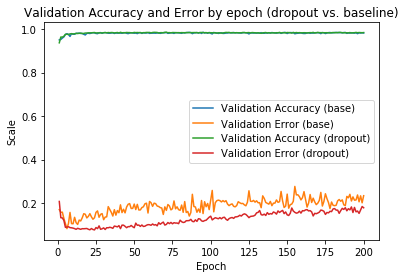

In [8]:
history, xvals = network_d.stats()
verr2, vacc2, terr2, tacc2 = history['val_loss'], history['val_acc'], history['loss'], history['acc']
plt.plot(xvals, vacc1, label='Validation Accuracy (base)')
plt.plot(xvals, verr1, label='Validation Error (base)')
plt.plot(xvals, vacc2, label='Validation Accuracy (dropout)')
plt.plot(xvals, verr2, label='Validation Error (dropout)')
plt.xlabel("Epoch")
plt.ylabel("Scale")
plt.legend(loc='best')
plt.title("Validation Accuracy and Error by epoch (dropout vs. baseline)")

Observation: The dropout model yields similar results as the baseline model. The validation error steadily increases after around the 20th epoch, implying overfitting problems have occured. This reminds us to set the epochs argument to be around 20 to prevent overfitting issues.

When comparing these two models, it is easy to observe that the dropout model is comparatively better than the baseline model after the validation error gets stabilized.

#### iii. Weight regularization

In [9]:
network_l1 = Network()
network_l1.l1()
network_l1.train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 124us/step - loss: 13.7846 - acc: 0.6648 - val_loss: 3.9990 - val_acc: 0.7809
Epoch 2/200
50000/50000 [==============================] - 6s 114us/step - loss: 3.0667 - acc: 0.7868 - val_loss: 2.3734 - val_acc: 0.8525
Epoch 3/200
50000/50000 [==============================] - 6s 114us/step - loss: 2.1976 - acc: 0.8318 - val_loss: 1.9257 - val_acc: 0.8679
Epoch 4/200
50000/50000 [==============================] - 6s 113us/step - loss: 1.8699 - acc: 0.8552 - val_loss: 1.7573 - val_acc: 0.8685
Epoch 5/200
50000/50000 [==============================] - 6s 112us/step - loss: 1.6752 - acc: 0.8747 - val_loss: 1.5351 - val_acc: 0.9033
Epoch 6/200
50000/50000 [==============================] - 6s 113us/step - loss: 1.5525 - acc: 0.8863 - val_loss: 1.4878 - val_acc: 0.8954
Epoch 7/200
50000/50000 [==============================] - 6s 114us/step - loss: 1.4728 - acc: 0.8933 - val_loss: 1

50000/50000 [==============================] - 6s 113us/step - loss: 0.9617 - acc: 0.9552 - val_loss: 0.9495 - val_acc: 0.9604
Epoch 60/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.9588 - acc: 0.9565 - val_loss: 0.9385 - val_acc: 0.9638
Epoch 61/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9556 - acc: 0.9569 - val_loss: 0.9614 - val_acc: 0.9541
Epoch 62/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.9557 - acc: 0.9563 - val_loss: 0.9856 - val_acc: 0.9454
Epoch 63/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9526 - acc: 0.9567 - val_loss: 0.9780 - val_acc: 0.9495
Epoch 64/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.9536 - acc: 0.9552 - val_loss: 0.9533 - val_acc: 0.9547
Epoch 65/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.9517 - acc: 0.9553 - val_loss: 0.9425 - val_acc: 0.9598
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 6s 113us/step - loss: 0.9058 - acc: 0.9602 - val_loss: 0.9500 - val_acc: 0.9507
Epoch 118/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.9032 - acc: 0.9608 - val_loss: 0.9153 - val_acc: 0.9558
Epoch 119/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9037 - acc: 0.9599 - val_loss: 0.8968 - val_acc: 0.9639
Epoch 120/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.9058 - acc: 0.9594 - val_loss: 0.8925 - val_acc: 0.9655
Epoch 121/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9007 - acc: 0.9617 - val_loss: 0.9083 - val_acc: 0.9615
Epoch 122/200
50000/50000 [==============================] - 6s 113us/step - loss: 0.9031 - acc: 0.9608 - val_loss: 0.9206 - val_acc: 0.9568
Epoch 123/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.9012 - acc: 0.9605 - val_loss: 0.9390 - val_acc: 0.9508
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 0.8881 - acc: 0.9621 - val_loss: 0.8913 - val_acc: 0.9619
Epoch 176/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.8862 - acc: 0.9619 - val_loss: 0.9874 - val_acc: 0.9354
Epoch 177/200
50000/50000 [==============================] - 6s 112us/step - loss: 0.8833 - acc: 0.9633 - val_loss: 0.9142 - val_acc: 0.9538
Epoch 178/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.8817 - acc: 0.9637 - val_loss: 0.9220 - val_acc: 0.9527
Epoch 179/200
50000/50000 [==============================] - 6s 115us/step - loss: 0.8881 - acc: 0.9612 - val_loss: 0.8911 - val_acc: 0.9636
Epoch 180/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.8841 - acc: 0.9634 - val_loss: 0.8721 - val_acc: 0.9682
Epoch 181/200
50000/50000 [==============================] - 6s 114us/step - loss: 0.8826 - acc: 0.9630 - val_loss: 0.8742 - val_acc: 0.9671
Epoch 182/200
50000/50000 [

In [10]:
network_l2 = Network()
network_l2.l2()
network_l2.train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 137us/step - loss: 1.8305 - acc: 0.8142 - val_loss: 1.0489 - val_acc: 0.9344
Epoch 2/200
50000/50000 [==============================] - 6s 128us/step - loss: 0.8577 - acc: 0.9326 - val_loss: 0.5983 - val_acc: 0.9633
Epoch 3/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.5479 - acc: 0.9519 - val_loss: 0.4477 - val_acc: 0.9578
Epoch 4/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.4158 - acc: 0.9580 - val_loss: 0.3501 - val_acc: 0.9671
Epoch 5/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.3343 - acc: 0.9648 - val_loss: 0.3025 - val_acc: 0.9700
Epoch 6/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.2918 - acc: 0.9679 - val_loss: 0.2906 - val_acc: 0.9658
Epoch 7/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.2613 - acc: 0.9711 - val_loss: 0.

50000/50000 [==============================] - 6s 124us/step - loss: 0.0969 - acc: 0.9902 - val_loss: 0.1404 - val_acc: 0.9795
Epoch 60/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0971 - acc: 0.9903 - val_loss: 0.2495 - val_acc: 0.9490
Epoch 61/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0956 - acc: 0.9907 - val_loss: 0.1318 - val_acc: 0.9803
Epoch 62/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.1029 - acc: 0.9882 - val_loss: 0.1287 - val_acc: 0.9810
Epoch 63/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0905 - acc: 0.9921 - val_loss: 0.1334 - val_acc: 0.9798
Epoch 64/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0987 - acc: 0.9899 - val_loss: 0.1363 - val_acc: 0.9793
Epoch 65/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.0943 - acc: 0.9904 - val_loss: 0.1356 - val_acc: 0.9787
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 7s 131us/step - loss: 0.0798 - acc: 0.9931 - val_loss: 0.1442 - val_acc: 0.9766
Epoch 118/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.0842 - acc: 0.9911 - val_loss: 0.1408 - val_acc: 0.9772
Epoch 119/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.0820 - acc: 0.9923 - val_loss: 0.2251 - val_acc: 0.9489
Epoch 120/200
50000/50000 [==============================] - 6s 130us/step - loss: 0.0836 - acc: 0.9916 - val_loss: 0.1198 - val_acc: 0.9822
Epoch 121/200
50000/50000 [==============================] - 7s 130us/step - loss: 0.0846 - acc: 0.9913 - val_loss: 0.1377 - val_acc: 0.9764
Epoch 122/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.0844 - acc: 0.9919 - val_loss: 0.1411 - val_acc: 0.9732
Epoch 123/200
50000/50000 [==============================] - 7s 132us/step - loss: 0.0850 - acc: 0.9911 - val_loss: 0.1286 - val_acc: 0.9813
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 6s 129us/step - loss: 0.0808 - acc: 0.9919 - val_loss: 0.1687 - val_acc: 0.9664
Epoch 176/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.0791 - acc: 0.9914 - val_loss: 0.1292 - val_acc: 0.9789
Epoch 177/200
50000/50000 [==============================] - 7s 132us/step - loss: 0.0767 - acc: 0.9925 - val_loss: 0.1437 - val_acc: 0.9726
Epoch 178/200
50000/50000 [==============================] - 7s 132us/step - loss: 0.0775 - acc: 0.9924 - val_loss: 0.2293 - val_acc: 0.9506
Epoch 179/200
50000/50000 [==============================] - 7s 139us/step - loss: 0.0809 - acc: 0.9915 - val_loss: 0.1258 - val_acc: 0.9801
Epoch 180/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.0773 - acc: 0.9925 - val_loss: 0.1479 - val_acc: 0.9739
Epoch 181/200
50000/50000 [==============================] - 7s 142us/step - loss: 0.0784 - acc: 0.9919 - val_loss: 0.1264 - val_acc: 0.9791
Epoch 182/200
50000/50000 [

Text(0.5,1,'Comparion of Validation Error by epoch across the four epochs')

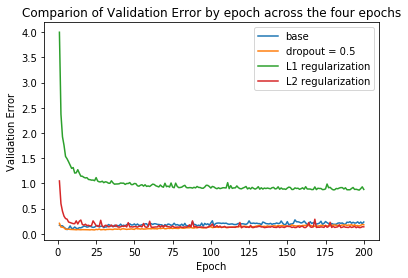

In [11]:
history, xvals = network_l1.stats()
verr3, vacc3, terr3, tacc3 = history['val_loss'], history['val_acc'], history['loss'], history['acc']
history, xvals = network_l2.stats()
verr4, vacc4, terr4, tacc4 = history['val_loss'], history['val_acc'], history['loss'], history['acc']

plt.plot(xvals, verr1, label='base')
plt.plot(xvals, verr2, label='dropout = 0.5' )
plt.plot(xvals, verr3, label='L1 regularization')
plt.plot(xvals, verr4, label='L2 regularization')
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.legend(loc='best')
plt.title("Comparion of Validation Error by epoch across the four epochs")

From the table we can see the dropout and the model with l2 weight regularization performs the best. The baseline model yields a similar low validation error, the model with l1 weight regularization has the worst performance. Based on the calculation below, the dropout model tends to have the best performace.

In [12]:
print("minimum error\n")
print("baseline:", min(verr1))
print("dropout:", min(verr2))
print("L1 reg:", min(verr3))
print("L2 reg:", min(verr4))

minimum error

baseline: 0.0829880325794
dropout: 0.0771092109442
L1 reg: 0.866425745201
L2 reg: 0.119766429901


#### iv. Final Model

From part iii) we can know the dropout model has the best performance among the four models. We now need to estimate the number of epochs needed to achieve the minimum validation error.

In [13]:
verr2.index(min(verr2))

23

It turns out that 24 epochs are needed to achieve the minimum validation error.

In [14]:
class FNetwork(Network):
    epochs = 24
    def train(self):
        self._network.compile(optimizer='rmsprop', 
                        loss='categorical_crossentropy', 
                        metrics=['acc'])
        self._fit = self._network.fit(train_images, train_labels, 
                                      epochs=FNetwork.epochs, 
                                      batch_size=Network.batchsize)
    def evaluate(self):
        test_loss, test_acc = self._network.evaluate(test_images, test_labels)
        return test_loss, test_acc

In [15]:
networkf = FNetwork()
networkf.drop_out()
networkf.train()
test_loss, test_acc = networkf.evaluate()
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Epoch 1/24
60000/60000 [==============================] - 9s 142us/step - loss: 0.6466 - acc: 0.7892
Epoch 2/24
60000/60000 [==============================] - 8s 134us/step - loss: 0.2406 - acc: 0.9313
Epoch 3/24
60000/60000 [==============================] - 8s 127us/step - loss: 0.1776 - acc: 0.9505
Epoch 4/24
60000/60000 [==============================] - 8s 132us/step - loss: 0.1505 - acc: 0.9575
Epoch 5/24
60000/60000 [==============================] - 8s 134us/step - loss: 0.1315 - acc: 0.9629
Epoch 6/24
60000/60000 [==============================] - 8s 133us/step - loss: 0.1179 - acc: 0.9682
Epoch 7/24
60000/60000 [==============================] - 8s 138us/step - loss: 0.1094 - acc: 0.9696
Epoch 8/24
60000/60000 [==============================] - 8s 131us/step - loss: 0.1018 - acc: 0.9716
Epoch 9/24
60000/60000 [==============================] - 7s 123us/step - loss: 0.0975 - acc: 0.9738
Epoch 10/24
60000/60000 [==============================] - 8s 125us/step - loss: 0.0892 - a

The test accuracy is 98.52%, better than the value 97.8% in the textbook.